# **Possible BigFoot Depictions in Indian Culture**

 This project is inspired by a youtube video made by Trey the Explainer called "The Native Bigfoot", in which he talks about books that claim that multiple native american tribes have depictions of the cryptid Bigfoot. In his video, he also provides us with some data he collected and organized in an excel sheet, making it a great subject of research using data analysis and data science.

 This project aims to create a predictive model using Machine Learning to predict Bigfoot-like depictions based on Trey's data and vague description of what he considers an account of a creature that is Bigfoot-like.

Links:
* https://www.youtube.com/watch?v=7zJhJsdoTYQ&t=3164s
* https://www.youtube.com/watch?v=7zJhJsdoTYQ&t=3164s

 # ***1. Exploratory Data Analysis***

 In this part of the project the date is read, cleaned, analysed and transformed, so it can have further uses.
 

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing the CSV File

The excel file was downloaded as a .csv as it is a bit easiers to work with

In [2]:
df = pd.read_csv("C:\\Users\\gabri\\Desktop\\Data Science\\Projetos\\Bigfoot\\Bigfoot Myths, Legends, and Stories spreadsheet by Trey the Explainer.csv")

## Checking Data 

In [3]:
df.shape

(154, 26)

In [4]:
df.describe(include='O')

,name,culture,description
count,154,153,154
unique,141,70,154
top,Cannibals,Comanche,"name literally translates to ""little people"", ..."
freq,6,7,1


## Changing the Columns' Names

Changing the name of each column to shorter and simplified names to make it better to work with.

In [5]:
df_columns = ['name', 'culture', 'date', 'description', 'speaks', 'tools', 'fire',
       'clothes', 'guns', 'smell', 'shapeshifter', 'interbreeds', 'home',
       'bundle', 'weakspot', 'spikes', 'rockgiant', 'sticky', 'bows',
       'nondescript', 'kathy', 'suttles', 'expedition', 'christophermurphy',
       'monsterquest', 'loren']

In [6]:
df.columns = df_columns

## Checking Missing Data

In [7]:
df.isnull().sum()

name                  0
culture               1
date                 29
description           0
speaks                0
tools                 0
fire                  0
clothes               0
guns                  0
smell                 0
shapeshifter          0
interbreeds           0
home                  0
bundle                0
weakspot              0
spikes                0
rockgiant             0
sticky                0
bows                  0
nondescript           0
kathy                 0
suttles               0
expedition            0
christophermurphy     0
monsterquest          0
loren                 0
dtype: int64

## Changing Missing Values and X's to 0 and 1

The original excel sheet had X's and missing values to represente "yes" or "no", we need to change those values so we can work with them.

In [8]:
df.columns

Index(['name', 'culture', 'date', 'description', 'speaks', 'tools', 'fire',
       'clothes', 'guns', 'smell', 'shapeshifter', 'interbreeds', 'home',
       'bundle', 'weakspot', 'spikes', 'rockgiant', 'sticky', 'bows',
       'nondescript', 'kathy', 'suttles', 'expedition', 'christophermurphy',
       'monsterquest', 'loren'],
      dtype='object')

In [9]:
spcolumns = ['speaks', 'tools', 'fire',
       'clothes', 'guns', 'smell', 'shapeshifter', 'interbreeds', 'home',
       'bundle', 'weakspot', 'spikes', 'rockgiant', 'sticky', 'bows',
       'nondescript', 'kathy', 'suttles', 'expedition', 'christophermurphy',
       'monsterquest', 'loren']

In [10]:
for coluna in spcolumns:
    df[coluna].fillna('0', inplace=True)

In [11]:
for coluna in spcolumns:
    df[coluna].replace('X', '1', inplace=True)

In [12]:
df.head()

,name,culture,date,description,speaks,tools,fire,clothes,guns,smell,...,rockgiant,sticky,bows,nondescript,kathy,suttles,expedition,christophermurphy,monsterquest,loren
0,Cannibal Dwarves or jusfihhat,Nunivak,1930.0,"name literally translates to ""little people"", ...",1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,The Strange Creature of the Mountains,Yupik,1981.0,"""stands about a foot off the ground"" (small), ...",0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Wappeckquemow,Hoopa,NaN,nondescript giant father,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,Ke'-lok,Me-Wuk,1910.0,"Powerful Giant, lives in a roundhouse, play ga...",1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Oo-wel'-lin,Me-Wuk,1910.0,"Rock Giant, as big as a pine tree, cannibal, v...",0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


## Feature Engineering

In this part, some new features are created using the features we already have in the data, this can grant us a better understanding about the data and can increase the performance of machine learning algorithms.

### Creating "bigfootlike" Column Acording to Trey's Vague Description

This new feature is created according to Trey's description of what he considers "bigfoot-like" or not. 

In [13]:
bigfootlike = pd.Series([0] * 154)

In [14]:
bigfootlike.iloc[[14, 24, 25, 26, 47, 49, 62, 84, 110, 117, 124, 129, 130, 131, 141, 148, 153]] = 1

In [15]:
df['bigfootlike'] = bigfootlike
df.head()

,name,culture,date,description,speaks,tools,fire,clothes,guns,smell,...,sticky,bows,nondescript,kathy,suttles,expedition,christophermurphy,monsterquest,loren,bigfootlike
0,Cannibal Dwarves or jusfihhat,Nunivak,1930.0,"name literally translates to ""little people"", ...",1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,The Strange Creature of the Mountains,Yupik,1981.0,"""stands about a foot off the ground"" (small), ...",0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Wappeckquemow,Hoopa,NaN,nondescript giant father,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,Ke'-lok,Me-Wuk,1910.0,"Powerful Giant, lives in a roundhouse, play ga...",1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Oo-wel'-lin,Me-Wuk,1910.0,"Rock Giant, as big as a pine tree, cannibal, v...",0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [16]:
df['bigfootlike'].value_counts()

bigfootlike
0    137
1     17
Name: count, dtype: int64

### Creating 'intelligent' column

This can help evaluate if there's any correlation between intelligence and the description of bigfoot.

In [17]:
df['intelligent'] = 0

In [18]:
def checkintelligence(row):
    if row['speaks'] == 1 | row['tools'] == 1 | row['fire'] == 1 | row['clothes'] == 1 | row['guns'] == 1 | row['home'] == 1 | row['bundle'] | row['bows'] == 1:
        return 1
    else:
        return 0

In [19]:
df['intelligent'] = df.apply(lambda row: checkintelligence(row), axis=1)

In [20]:
(df['intelligent'] == 1).sum()

72

### Creating 'hairy' Column

Usually bigfoot is described as a hairy creature, so this new feature is created by checking de 'description' column for the word 'hairy'.

In [21]:
df['hairy'] = 0

In [22]:
def ishairy(description):
    if 'hairy' in description.lower():
        return 1
    else:
        return 0

In [23]:
df['hairy'] = df['description'].apply(ishairy)

In [24]:
(df['hairy'] == 1).sum()

18

### Creating 'probablyhuman' Column

This new feature is created based on the fact that most descriptions are probably of human beings, so the columns that can describe a human-like behavior or appearance are used to classify if a description is probably of a human or not.

In [25]:
df['probablyhuman'] = 0

In [26]:
def probabhuman(row):
    if row['speaks'] == 1 | row['tools'] == 1 | row['fire'] == 1 | row['clothes'] == 1 | row['guns'] == 1 | row['home'] == 1 | row['bundle'] | row['bows'] == 1 and row['hairy'] == 0 and row['rockgiant'] == 0:
        return 1
    else:
        return 0 

In [27]:
df['probablyhuman'] = df.apply(lambda row: probabhuman(row), axis=1)

In [28]:
(df['probablyhuman'] == 1).sum()

60

## Changing Column Types from int64 to Float64

In [29]:
df.columns

Index(['name', 'culture', 'date', 'description', 'speaks', 'tools', 'fire',
       'clothes', 'guns', 'smell', 'shapeshifter', 'interbreeds', 'home',
       'bundle', 'weakspot', 'spikes', 'rockgiant', 'sticky', 'bows',
       'nondescript', 'kathy', 'suttles', 'expedition', 'christophermurphy',
       'monsterquest', 'loren', 'bigfootlike', 'intelligent', 'hairy',
       'probablyhuman'],
      dtype='object')

In [30]:
spcolumns2 = ['speaks', 'tools', 'fire',
       'clothes', 'guns', 'smell', 'shapeshifter', 'interbreeds', 'home',
       'bundle', 'weakspot', 'spikes', 'rockgiant', 'sticky', 'bows',
       'nondescript', 'kathy', 'suttles', 'expedition', 'christophermurphy',
       'monsterquest', 'loren', 'bigfootlike', 'intelligent', 'hairy',
       'probablyhuman']

In [31]:
df[spcolumns2] = df[spcolumns2].apply(lambda x: x.astype('float64'))

In [32]:
df.dtypes

name                  object
culture               object
date                 float64
description           object
speaks               float64
tools                float64
fire                 float64
clothes              float64
guns                 float64
smell                float64
shapeshifter         float64
interbreeds          float64
home                 float64
bundle               float64
weakspot             float64
spikes               float64
rockgiant            float64
sticky               float64
bows                 float64
nondescript          float64
kathy                float64
suttles              float64
expedition           float64
christophermurphy    float64
monsterquest         float64
loren                float64
bigfootlike          float64
intelligent          float64
hairy                float64
probablyhuman        float64
dtype: object

# ***2. Data Visualization***

## Using groupby() and crosstab() to Better Understand the Data
With this, we can check the correlation between the descriptions.

In [33]:
df[['hairy', 'bigfootlike']].groupby(['hairy']).value_counts()

hairy  bigfootlike
0.0    0.0            129
       1.0              7
1.0    1.0             10
       0.0              8
Name: count, dtype: int64

In [34]:
df[['hairy', 'intelligent']].groupby(['intelligent']).value_counts()

intelligent  hairy
0.0          0.0      72
             1.0      10
1.0          0.0      64
             1.0       8
Name: count, dtype: int64

In [35]:
pd.crosstab(index=[df['hairy'], df['intelligent']], columns=df['probablyhuman']).style.background_gradient(cmap='inferno')

In [36]:
pd.crosstab(index=[df['hairy'], df['intelligent']], columns=df['bigfootlike']).style.background_gradient(cmap='inferno')

In [37]:
pd.crosstab(df['probablyhuman'], df['bigfootlike']).style.background_gradient(cmap='inferno')

bigfootlike,0.000000,1.000000
probablyhuman,,
0.000000,77,17
1.000000,60,0


In [38]:
pd.crosstab(df['intelligent'], df['bigfootlike'])\
.style.background_gradient(cmap='inferno')

bigfootlike,0.000000,1.000000
intelligent,,
0.000000,69,13
1.000000,68,4


In [39]:
df.groupby("bigfootlike").date.agg(min_date="min", max_date="max")

,min_date,max_date
bigfootlike,,
0.0,1791.0,2005.0
1.0,1895.0,2005.0


In [40]:
pd.crosstab(df["bigfootlike"], df["kathy"])

kathy,0.0,1.0
bigfootlike,,
0.0,35,102
1.0,1,16


In [41]:
pd.crosstab(df["bigfootlike"], df["expedition"])

expedition,0.0,1.0
bigfootlike,,
0.0,117,20
1.0,13,4


In [42]:
pd.crosstab(df["bigfootlike"], df["monsterquest"])

monsterquest,0.0,1.0
bigfootlike,,
0.0,135,2
1.0,15,2


## Checking The Correlation Between the Variables

In [43]:
df[['speaks', 'bigfootlike']].corr()

,speaks,bigfootlike
speaks,1.000000,-0.163963
bigfootlike,-0.163963,1.000000


In [44]:
df[['rockgiant', 'bigfootlike']].corr()

,rockgiant,bigfootlike
rockgiant,1.000000,-0.102403
bigfootlike,-0.102403,1.000000


In [45]:
df[['hairy', 'intelligent', 'bigfootlike', 'probablyhuman']].corr()

,hairy,intelligent,bigfootlike,probablyhuman
hairy,1.000000,-0.016835,0.516803,-0.290655
intelligent,-0.016835,1.000000,-0.163963,0.852614
bigfootlike,0.516803,-0.163963,1.000000,-0.281434
probablyhuman,-0.290655,0.852614,-0.281434,1.000000


<Axes: >

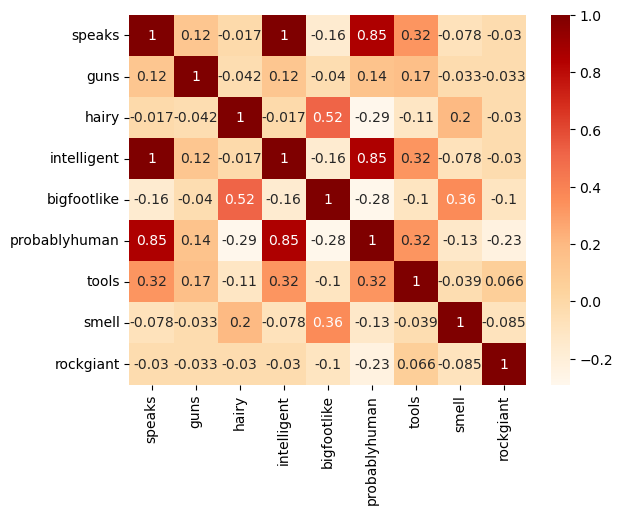

In [46]:
f, ax = plt.subplots(dpi=100)
sns.heatmap(df[['speaks', 'guns', 'hairy', 'intelligent', 'bigfootlike', 'probablyhuman', 'tools',\
               'smell', 'rockgiant']].corr(), annot=True, cmap='OrRd')

## Using Graphs To Visualize the Data

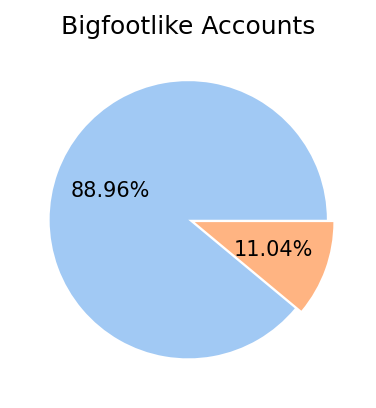

In [47]:
plt.figure(figsize=(7, 3), dpi=150)
plt.pie(df['bigfootlike'].value_counts(), explode=[0,0.05], autopct='%0.2f%%', colors=sns.color_palette("pastel"))
plt.title('Bigfootlike Accounts')
plt.ylabel('')
plt.show()

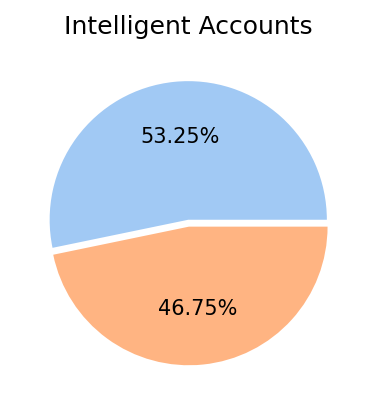

In [48]:
plt.figure(figsize=(7, 3), dpi=150)
plt.pie(df['intelligent'].value_counts(), explode=[0,0.05], autopct='%0.2f%%', colors=sns.color_palette("pastel"))
plt.title('Intelligent Accounts')
plt.ylabel('')
plt.show()

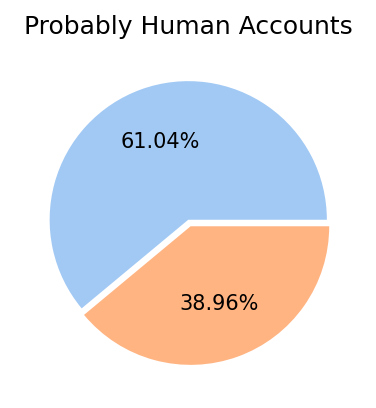

In [49]:
plt.figure(figsize=(7, 3), dpi=150)
plt.pie(df['probablyhuman'].value_counts(), explode=[0,0.05], autopct='%0.2f%%', colors=sns.color_palette("pastel"))
plt.title('Probably Human Accounts')
plt.ylabel('')
plt.show()

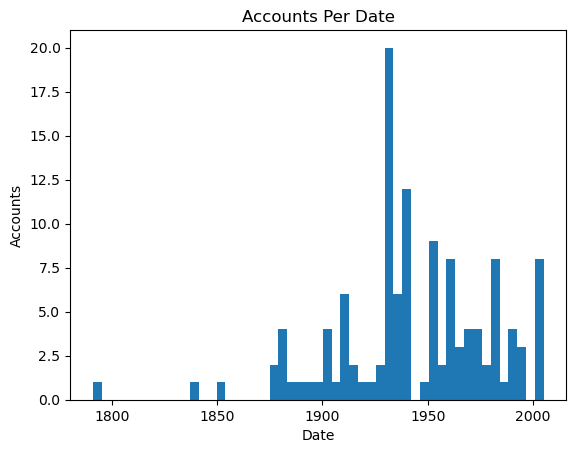

In [50]:
plt.hist(df['date'], bins=len(df['date'].unique()))
plt.title("Accounts Per Date")
plt.xlabel("Date")
plt.ylabel("Accounts")
plt.show()

<Figure size 4500x3000 with 0 Axes>

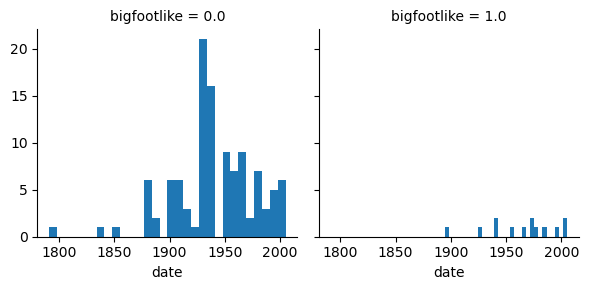

In [51]:
# checking the dates where the accounts described can be considered as bigfoot-like or not

plt.figure(figsize=(9, 6), dpi=500)
g = sns.FacetGrid(df, col='bigfootlike')
g.map(plt.hist, 'date', bins=30)
plt.show()

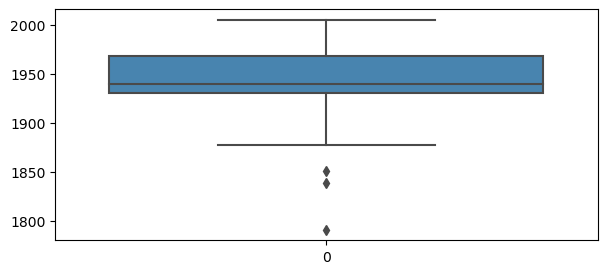

In [52]:
# Checking the outliers to have an idea of the period of time that has the most accounts

plt.figure(figsize=(7, 3), dpi=100)
sns.boxplot(df['date'], palette="Blues_d")
plt.show()

In [53]:
# Display Top 10 Cultures

top10cult = df.culture.value_counts().head(10)

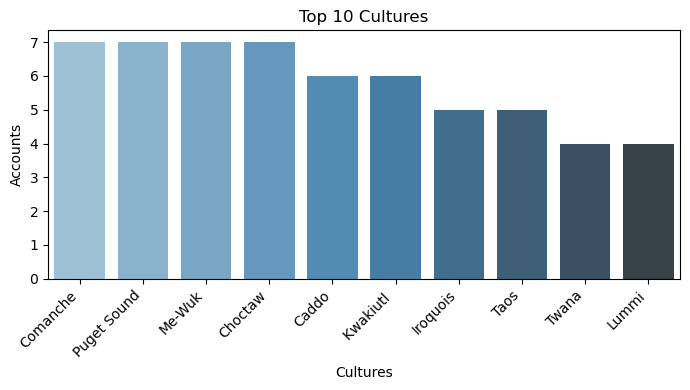

In [54]:
plt.figure(figsize=(7, 4))
sns.barplot(x=top10cult.index, y=top10cult.values, palette="Blues_d")
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cultures')
plt.xlabel('Cultures')
plt.ylabel('Accounts')
plt.tight_layout()
plt.show()

In [55]:
bigfootcult = df.loc[df.bigfootlike == 1, 'culture']

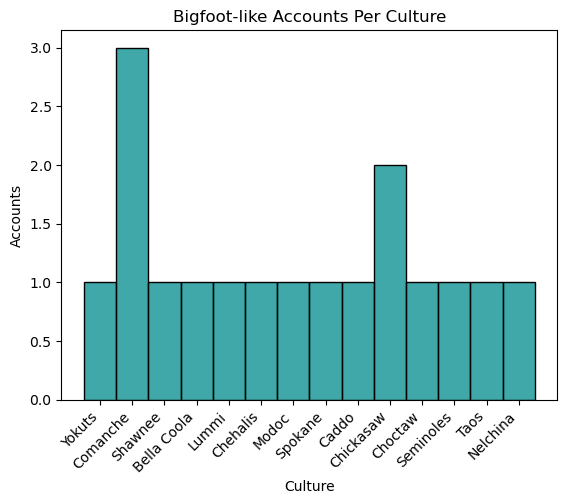

In [56]:
# Here we check the cultures that had bigfoot-like descriptions

sns.histplot(bigfootcult, bins=14, color='darkcyan')
plt.title("Bigfoot-like Accounts Per Culture")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Culture")
plt.ylabel("Accounts")
plt.show()

# ***3. Using Linear Regression to Predict Dates***
In this part of the project, we use the variables to see if we can predict the dates based on them.

## Checling Missing Date Values

In [57]:
df.date.isnull().sum()

29

## Checking Correlation
We can see that the variables have almost no correlation with the date.

In [58]:
df.iloc[:, 4:30].corrwith(df['date'])

speaks              -0.131761
tools               -0.047331
fire                -0.043565
clothes             -0.005483
guns                 0.058371
smell                0.168436
shapeshifter         0.012622
interbreeds         -0.041705
home                -0.185256
bundle               0.057269
weakspot            -0.153776
spikes               0.003484
rockgiant           -0.207046
sticky               0.124941
bows                -0.108551
nondescript          0.028211
kathy                0.131338
suttles             -0.038365
expedition           0.128701
christophermurphy    0.074504
monsterquest        -0.000196
loren                0.001983
bigfootlike          0.194858
intelligent         -0.131761
hairy               -0.027471
probablyhuman       -0.056791
dtype: float64

## Data Preprocessing
Here the data is transformed so we can use the linear regression.

### Importing Libraries

In [59]:
from sklearn.model_selection import train_test_split

### Splitting Data Into Train and Test to Fill Missing Values Later

In [60]:
dfdate = df.copy()

In [61]:
# Choosing variables that'll be used 

dfdate = dfdate[['bigfootlike', 'expedition', 'suttles', 'kathy', 'sticky', 'smell','guns', 'date']]

In [62]:
train_date = dfdate.dropna()
test_date = dfdate.loc[dfdate.date.isnull()].drop('date', axis=1)

In [63]:
train_date.shape, test_date.shape

((125, 8), (29, 7))

### Defining X and y to Train the Model

In [64]:
X = train_date.drop('date', axis=1)
y = train_date['date']

In [65]:
X.shape, y.shape

((125, 7), (125,))

### Splitting the Data Into 80% and 20%

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=111)

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 7), (25, 7), (100,), (25,))

## Training the Model

In [68]:
from sklearn import linear_model

In [69]:
lm = linear_model.LinearRegression()

In [70]:
lm.fit(X_train, y_train)

LinearRegression()

In [71]:
pred = lm.predict(X_test)
pred.shape

(25,)

In [72]:
# The model's score is negative, indicating that the prediction is not accurate

lm.score(X_test, y_test)

-0.12065276659803326

## Checking the RMSE
A metric used to determine the accuracy of the model

In [73]:
from sklearn.metrics import mean_squared_error

### Checking With Predictions

In [74]:
mse = mean_squared_error(y_test, pred)

In [75]:
rmse = np.sqrt(mse)
rmse

48.34030563525865

### Checking if the Mean is More Accurate
The accuracy is terrible, so we check if just replacing the missing dates with the mean of the dates is more accurate or not

In [76]:
mse = mean_squared_error(y, np.repeat(y.mean(), len(y)))

In [77]:
rmsemean = np.sqrt(mse)
if rmsemean < rmse:
    print('Replacing missing values with mean is more accurate')
else:
    print('Predictions are more accurate')

Replacing missing values with mean is more accurate


### Visualizing Residues

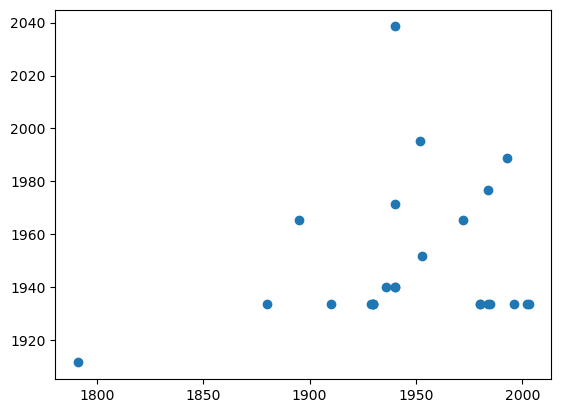

In [78]:
plt.scatter(y_test, pred)
plt.show()

## Feature Importance

now we check what features were more important in the prediction

In [79]:
from sklearn.feature_selection import RFECV

In [80]:
selector = RFECV(estimator=lm, step=1, cv=5)

In [81]:
selector.fit(X, y)

RFECV(cv=5, estimator=LinearRegression())

In [82]:
selector.ranking_

array([7, 5, 2, 1, 3, 4, 6])

In [83]:
selector.feature_names_in_

array(['bigfootlike', 'expedition', 'suttles', 'kathy', 'sticky', 'smell',
       'guns'], dtype=object)

In [84]:
selector.n_features_

1

In [85]:
coef = lm.coef_

In [86]:
feature_names = X_train.columns

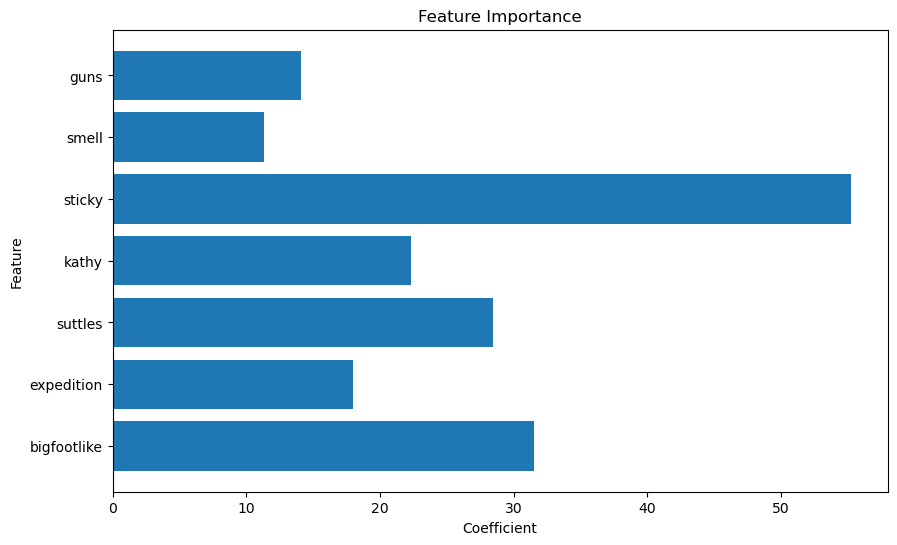

In [87]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coef)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# 4. ***Using Machine Learning to Predict Bigfoot-Like Accounts***

Now we can use all the features and use algorithms to predict if a description is bigfoot-like or not

## Treating Data for the Machine Learning Model

In [88]:
df.isnull().sum()

name                  0
culture               1
date                 29
description           0
speaks                0
tools                 0
fire                  0
clothes               0
guns                  0
smell                 0
shapeshifter          0
interbreeds           0
home                  0
bundle                0
weakspot              0
spikes                0
rockgiant             0
sticky                0
bows                  0
nondescript           0
kathy                 0
suttles               0
expedition            0
christophermurphy     0
monsterquest          0
loren                 0
bigfootlike           0
intelligent           0
hairy                 0
probablyhuman         0
dtype: int64

In [89]:
len(df)

154

### Filling Missing Dates With the Mean

In [90]:
meandate = df.date.mean().round()
meandate

1943.0

In [91]:
df['date'].fillna(meandate, inplace=True)

### Dropping Columns That Won't Be Used

These columns are mainly in the string format, so the algorithm won't understand them.

In [92]:
df.drop(['name', 'culture', 'description', 'nondescript'], axis=1, inplace=True)

In [93]:
df.isnull().sum()

date                 0
speaks               0
tools                0
fire                 0
clothes              0
guns                 0
smell                0
shapeshifter         0
interbreeds          0
home                 0
bundle               0
weakspot             0
spikes               0
rockgiant            0
sticky               0
bows                 0
kathy                0
suttles              0
expedition           0
christophermurphy    0
monsterquest         0
loren                0
bigfootlike          0
intelligent          0
hairy                0
probablyhuman        0
dtype: int64

In [94]:
df.shape, df.columns

((154, 26),
 Index(['date', 'speaks', 'tools', 'fire', 'clothes', 'guns', 'smell',
        'shapeshifter', 'interbreeds', 'home', 'bundle', 'weakspot', 'spikes',
        'rockgiant', 'sticky', 'bows', 'kathy', 'suttles', 'expedition',
        'christophermurphy', 'monsterquest', 'loren', 'bigfootlike',
        'intelligent', 'hairy', 'probablyhuman'],
       dtype='object'))

## Checking Correlation Between the Variables
Here we check how much every other variable is correlated to a bigfoot-like description

In [95]:
df.corrwith(df['bigfootlike'])

date                 0.170989
speaks              -0.163963
tools               -0.102836
fire                -0.129338
clothes             -0.039316
guns                -0.040407
smell                0.361421
shapeshifter        -0.032427
interbreeds          0.052205
home                -0.139974
bundle              -0.042691
weakspot            -0.076870
spikes              -0.057524
rockgiant           -0.102403
sticky               0.036159
bows                -0.040407
kathy                0.145609
suttles             -0.133463
expedition           0.077162
christophermurphy    0.221565
monsterquest         0.203026
loren                0.088908
bigfootlike          1.000000
intelligent         -0.163963
hairy                0.516803
probablyhuman       -0.281434
dtype: float64

## Data Preprocessing

### Checking if the Data is Unbalanced
If the data is unbalanced, it can negatively impact the performance of our model.

bigfootlike
0.0    137
1.0     17
Name: count, dtype: int64

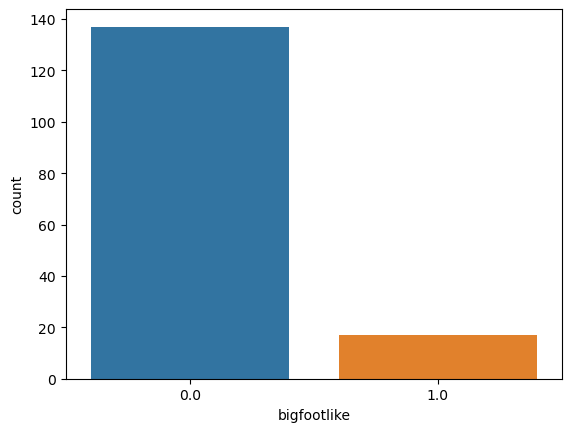

In [96]:
sns.countplot(x=df['bigfootlike'])
df.bigfootlike.value_counts()

### Defining X and y to Train the Model

In [97]:
X = df.drop('bigfootlike', axis=1)
y = df['bigfootlike']

In [98]:
X.shape, y.shape

((154, 25), (154,))

### Oversampling
As we can see, the data is heavily unbalanced, so we can use oversampling to balance it and increase the algorithms' performances.

#### Importing Libraries

In [99]:
from imblearn.over_sampling import RandomOverSampler

#### Using Naive Random Over-Sampling

In [100]:
ros = RandomOverSampler(random_state=0)

X, y = ros.fit_resample(X, y)

### Splitting the Data Into 70% and 30% to Train and Test the Model

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

In [102]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((191, 25), (83, 25), (191,), (83,))

## Training the Models

### Importing Libraries

In [103]:
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Organizing and Training

In [104]:
class AuxiliaryModel(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

In [105]:
models = [{'name': 'etree',
            'model': ExtraTreesClassifier},
           {'name': 'gradboost',
             'model': GradientBoostingClassifier}, 
           {'name': 'adaboost',
             'model': AdaBoostClassifier},
           {'name': 'KNN',
            'model': KNeighborsClassifier},
           {'name': 'Dtree',
            'model': DecisionTreeClassifier},
           {'name': 'RForest',
            'model': RandomForestClassifier}
          ]

In [106]:
models[-1]['name']

'RForest'

In [107]:
results = []
for model in models:
    x = AuxiliaryModel(clf=model['model'])
    # Treining the model
    x.fit(X_train, y_train)
    
    # Generating the prediction
    x_pred = x.predict(X_test)
    
    # gGenerating the score
    accuracy = round(x.score(X_test,y_test)*100,2)
    
    results.append({'name': model['name'],
                       'score': accuracy,
                       'pred': x_pred })

In [108]:
models = pd.DataFrame(results)

### Model Results
The model got a great score! However, we need to check the score again using cross-validation.

In [109]:
models[['name','score']].sort_values(by='score', ascending=False)

,name,score
0,etree,95.18
1,gradboost,95.18
2,adaboost,95.18
4,Dtree,95.18
5,RForest,95.18
3,KNN,81.93


## Cross-Validation
Cross-validation is used to check the performance of the model by training it with multiple different portions of train and test data.

In [110]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

In [111]:
kfold = KFold(n_splits=5)

In [112]:
etree = ExtraTreesClassifier(n_estimators=300, random_state=111)

In [113]:
result_etree = cross_val_score(etree, X_train, y_train, cv=kfold, scoring='accuracy')
print("Etree score:", result_etree.mean())

Etree score: 0.9475033738191634


Here we can see that the model did great, but we still got to do some other tests to really check the model's performance.

In [114]:
etree.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=300, random_state=111)

In [115]:
etree_pred = etree.predict(X_test)
etree_pred

array([1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])

## Confusion Matrix
The confusion Matrix can show us what the model got right or wrong. We can see it got 4 false positives.

In [116]:
from sklearn.metrics import confusion_matrix

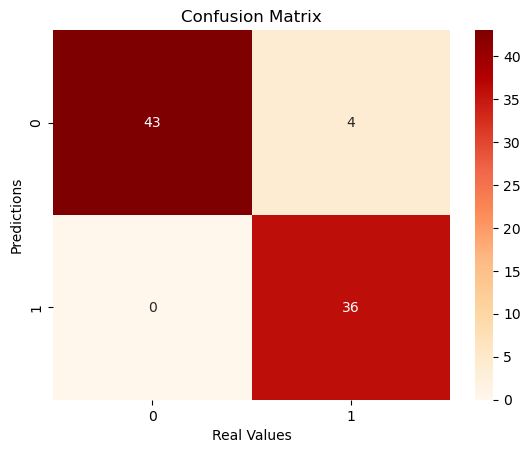

In [117]:
sns.heatmap(confusion_matrix(y_test, etree_pred), cmap='OrRd', annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.show()

## Performance Metrics

Here we check the recall, accuracy, precision and F1 score of the model. The metrics indicate a great performance.


In [118]:
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

In [119]:
recall_score(y_test, etree_pred)

1.0

In [120]:
accuracy_score(y_test, etree_pred)

0.9518072289156626

In [121]:
precision_score(y_test, etree_pred)

0.9

In [122]:
f1_score(y_test, etree_pred)

0.9473684210526316

## ROC Curve
With this curve, we can see what's the best threshold for our model.

In [123]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Plotting the Curve

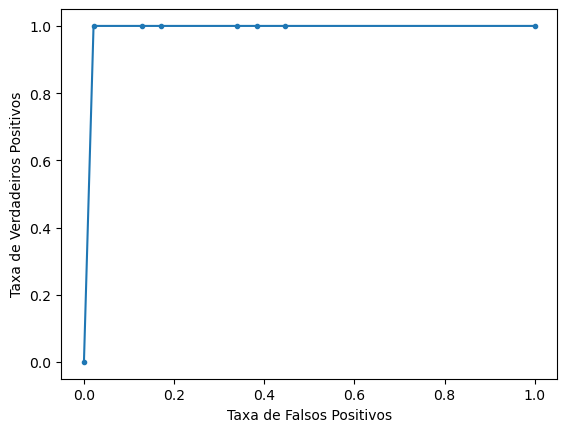

In [124]:
etree_prob = etree.predict_proba(X_test)
etree_prob = etree_prob[:,1]

fpr, tpr, thresholds = roc_curve(y_test, etree_prob)

plt.plot(fpr, tpr, marker='.', label='Etree')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.show()

### AUC Value

The Area Under the Curve value can be used to demonstrate the quality of the model.

In [125]:
etree_auc = roc_auc_score(y_test, etree_prob)
print('Etree: ROC AUC=%.3f' %(etree_auc))

Etree: ROC AUC=0.989


### Optimal Threshold
Here que can see what is the best threshold the increase the model's precision.

In [126]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 1.0


In [127]:
new_threshold = 1.0
y_pred_adjusted = (etree_prob >= new_threshold).astype(int)

### Confusion Matrics with the New Threshold
Now we check the new false positive rate. 


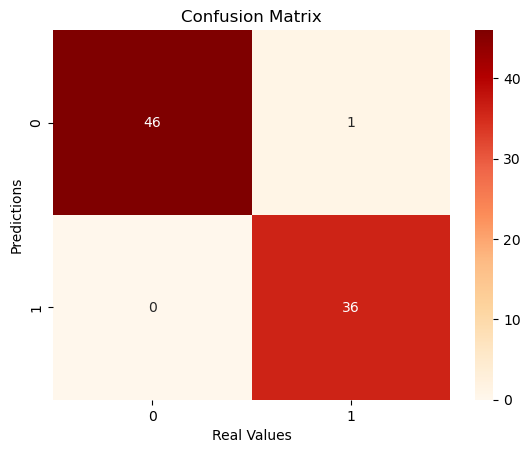

In [128]:
sns.heatmap(confusion_matrix(y_test, y_pred_adjusted), cmap='OrRd', annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.show()

### Checking the Performance Metrics Again
Here we can see that the precision was heavily increased.

In [129]:
recall_score(y_test, y_pred_adjusted)

1.0

In [130]:
accuracy_score(y_test, y_pred_adjusted)

0.9879518072289156

In [131]:
precision_score(y_test, y_pred_adjusted)

0.972972972972973

In [132]:
f1_score(y_test, y_pred_adjusted)

0.9863013698630138

## Feature Importance
In the final part of this project, we check which features were more important to qualify a description as bigfoot-like or not.

In [133]:
importances = etree.feature_importances_

In [134]:
feature_names = X_train.columns.values

In [135]:
feature_dataframe = pd.DataFrame({'Features': feature_names, 
                                  'Feature Importance': importances})

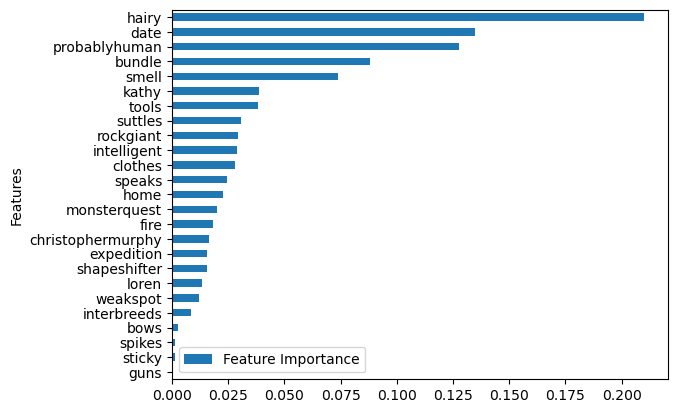

In [136]:
feature_dataframe.sort_values(by='Feature Importance').plot.barh(x='Features')
plt.show()

# Conclusion
As we can see, the model did great! Now it can be used to predict bigfoot-like descriptions using new data and considering the performance metrics, it'll do a great job!